# Convolutional Layers


## Why Use Convolutions?


In previous lessons, we used fully connected neural networks on images. As a reminder, we used the MNIST dataset, consisting of grayscale images of size $28 \times 28$, to introduce regularization, normalization, and demonstrate the potential of neural networks for image processing.

However, the network input size was $28 \times 28 = 784$, which is already quite large for a neural network, despite the small image size. For an image of size $224 \times 224 \times 3$ (small by current standards), the input size would be $150528$, which is impractical for fast processing.


## Possible Solutions


### Reducing Image Size


To address this issue, we might consider resizing the input image. However, doing so results in significant information loss, making it difficult to recognize the object in the image.


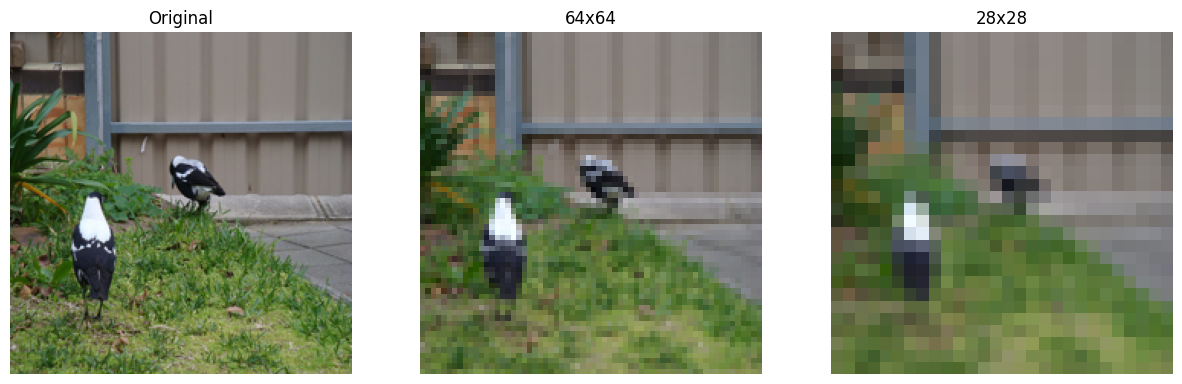

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

img=Image.open("images/SampleImageNet.JPEG").resize((224,224))
imgResized_64=img.resize((64,64))
imgResized_28=img.resize((28,28))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis('off')  
axes[1].imshow(imgResized_64)
axes[1].set_title("64x64")
axes[1].axis('off')  
axes[2].imshow(imgResized_28)
axes[2].set_title("28x28")
axes[2].axis('off')
plt.show()

As we can see, resizing is not a good solution, especially if we need to identify image details for effective classification or detection.


### Severely Limited First Hidden Layer


An input size of $150528$ becomes even more problematic when the first hidden layer has a large number of neurons. Indeed, the weights correspond to each connection between neurons in successive layers. If we assume the first hidden layer has $1024$ neurons, we would have $150528*1024 = 154 \text{ million}$ weights, which is enormous just for the connection between the first two layers.

We might consider having a first hidden layer with only a few dozen neurons to limit the number of weights. However, drastically reducing the dimension results in significant information loss, preventing satisfactory results with this approach.


### Convolutions


**Intuition**: A key feature of images is the presence of recurring patterns. Based on this idea, we can consider sharing weights among different pixels in the image.

**Basic Principle**: This leads us to the use of convolutional layers, which use convolution filters that scan each pixel of the image. The values of these filters are trainable and correspond to the weights of the neural network.

Here is an illustration of the convolution principle:

![Convolution](./images/conv.png)


**Why It Works**:
- Using convolutional layers prevents the number of weights from increasing with image size, allowing the processing of high-resolution images.
- Convolutional layers provide translation invariance, which is very useful for images (a dog image shifted by 4 pixels remains a dog image).
- Although information processing is local in a convolutional layer, successive convolutional layers enable global image processing (see the section on the receptive field in the next notebook).

**Additional Information**:
- In the explanatory figure, the input image is $4 \times 4$ in size. In practice, a color image contains $3$ channels. To process an image of size $4 \times 4 \times 3$, we would use filters of size $n \times n \times 3$, where $n$ is the filter size ($3$ in the explanatory figure). It is important to note that the depth of the convolution filter depends on the number of channels in the layer's input.
- Convolution can be seen as a *for* loop applied to a fully connected layer, where a small filter (with shared weights rather than unique weights per connection) slides over the image to detect local patterns. This significantly improves efficiency and enables weight sharing, greatly reducing memory requirements.


## Details of Convolutional Layers


We will now detail the various parameters of a convolutional layer based on the input parameters of the [torch.nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) function in PyTorch.

For clarity, the output of a convolutional layer is called a *FeatureMap*.


**in_channels**: The number of input channels to the layer (defines the depth of the convolution filters used).

**out_channels**: The number of convolution filters used in the layer (also corresponds to the number of channels in the output *FeatureMap*).

**kernel_size**: The size of a convolution filter. If this parameter is $3$, then the convolution filter is $3 \times 3$ in size. All convolution filters in the same layer must have the same size.

**stride**: The *stride* corresponds to the step size of the filter application. For example, a *stride* of $1$ means the filter should be applied to all pixels, while a *stride* of $2$ means it should be applied to every other pixel. A large *stride* reduces the image dimension (with a *stride* of 2, the output *FeatureMap* will be twice smaller than with a *stride* of 1).

**padding**: This parameter adds a border of size *padding* around the image to allow filters to be applied uniformly to all pixels, including those at the edges. Without *padding*, edge pixels would have no neighbors, and the filter could not be applied, reducing the image size during convolution. *Padding* addresses this by adding values (such as zeros or reflected values) around the image before applying the filters (see *zero-padding* in the explanatory figure).

**padding_mode**: Allows selecting the *padding* mode ("zeros" for *zero-padding*, for example).

**dilation**: The *dilation* parameter in a convolution layer defines the spacing between filter elements, allowing the filter to cover a wider area without increasing its size, thus capturing more spatial context in the image. The following figure illustrates *dilation*:

![Dilation](./images/dilation.png)

Figure extracted from *Du, Jinglong & Wang, Lulu & Liu, Yulu & Zhou, Zexun & He, Zhongshi & Jia, Yuanyuan. (2020). Brain MRI Super-Resolution Using 3D Dilated Convolutional Encoder–Decoder Network. IEEE Access. PP. 1-1. 10.1109/ACCESS.2020.2968395.*


## Pooling Layers


Another fundamental layer in convolutional neural networks is the *pooling* layer. This layer contains no learnable parameters and simply resizes the *feature map* using a technique of grouping adjacent pixels. In the next notebook, we will see how this layer is used in a convolutional neural network. Pooling layers also reduce sensitivity to shifts and distortions of patterns for better generalization.


There are two main types of pooling:
**MaxPooling**: *MaxPooling* is the pooling method that takes the maximum value from a group of adjacent pixels and sets it as the new value of the reduced image.
**AveragePooling**: *AveragePooling* takes the average value of the group of adjacent pixels and sets it as the new value of the reduced image.

The following figure shows the differences between *MaxPooling* and *AveragePooling*:

![Pooling](./images/pooling.png)
